#Analysing market trends and consumer behaviour for new product launch
##Final project - Group 6

##Data loading and prepration


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from statsmodels.formula.api import ols
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
sales_data = pd.read_csv('/content/drive/MyDrive/Final assignment/supermarket_sales.csv')

# Explore the structure of the dataset
print(sales_data.info())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14 

#Data preprocessing

In [3]:
# Data exploration (graphs, correlations, data preprocessing)
print(sales_data.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

In [4]:
# Missing data analysis
print(sales_data.isna().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


#Exploratory Data Analysis and visualization

In [6]:
# Product line frequency analysis
product_line_counts = sales_data['Product line'].value_counts()
print(product_line_counts)

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


In [38]:
# Sales distribution
sales_distribution = sales_data.groupby('Payment')['Total'].agg(['count', 'sum'])
print(sales_distribution)

# Payment type distribution
payment_type_counts = sales_data['Payment'].value_counts()
print(payment_type_counts)

             count         sum
Payment                       
Cash           344  112206.570
Credit card    311  100767.072
Ewallet        345  109993.107
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


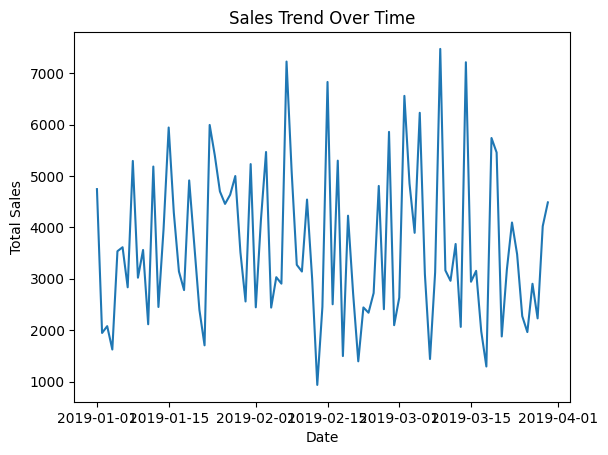

In [37]:
# Sales trend analysis
sales_data['Sale_Date'] = pd.to_datetime(sales_data['Date']).dt.date
sales_trend = sales_data.groupby('Sale_Date')['Total'].sum().reset_index()
plt.plot(sales_trend['Sale_Date'], sales_trend['Total'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

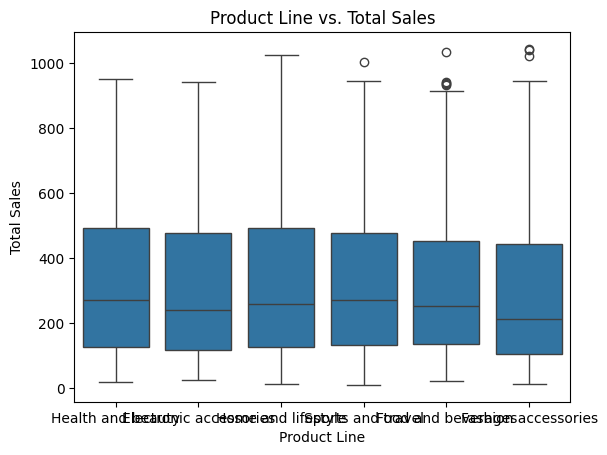

In [10]:
# Boxplot of product lines vs. total sales
sns.boxplot(x='Product line', y='Total', data=sales_data)
plt.title('Product Line vs. Total Sales')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

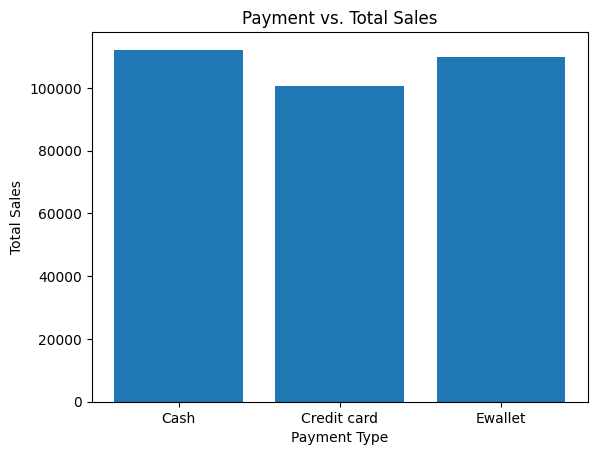

In [11]:
sales_data['Payment'] = sales_data['Payment'].astype('category')

# Group data by Payment type and calculate total sales
payment_type_sales = sales_data.groupby('Payment', observed=False, dropna=False)['Total'].sum().reset_index()

# Plot the bar chart
plt.bar(payment_type_sales['Payment'], payment_type_sales['Total'])
plt.title('Payment vs. Total Sales')
plt.xlabel('Payment Type')
plt.ylabel('Total Sales')
plt.show()

<Axes: >

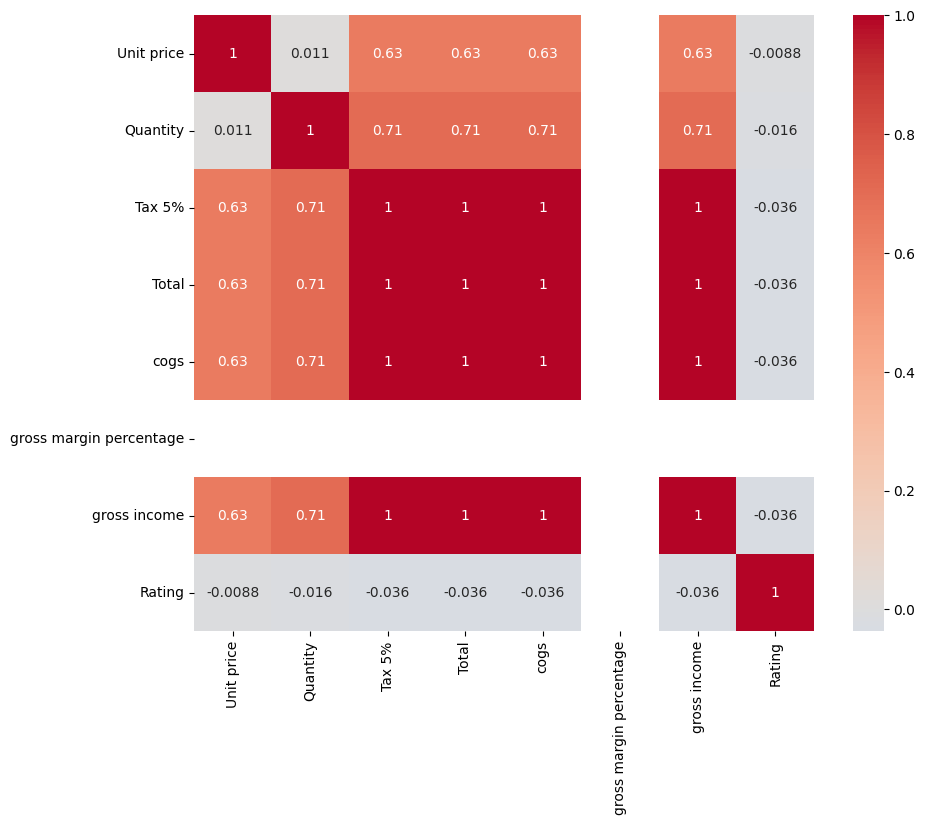

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

# Calculate the correlation matrix for the numeric columns
correlation_matrix = sales_data.select_dtypes(include=[np.number]).corr()

# Draw the correlation matrix using seaborn's heatmap function
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Save the correlation matrix as a PNG image

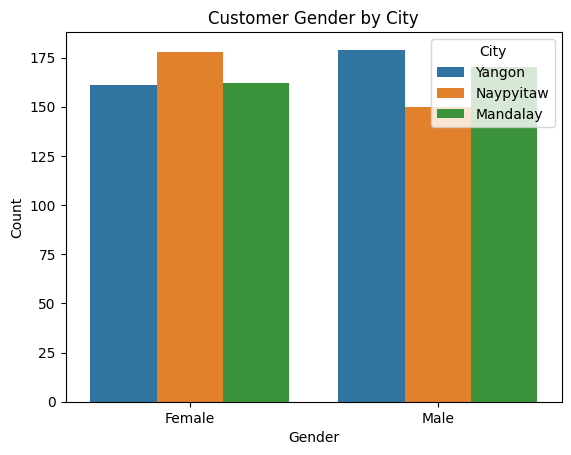

In [13]:
# Sales by gender and city
sns.countplot(x='Gender', hue='City', data=sales_data)
plt.title('Customer Gender by City')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

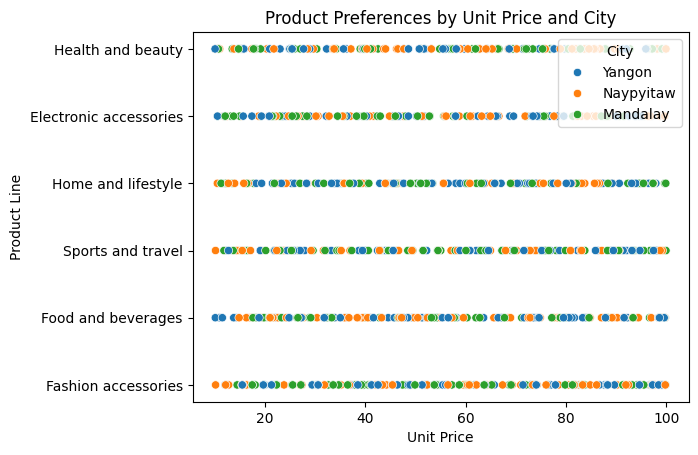

In [16]:
# Scatterplot of product preferences by unit price and city
sns.scatterplot(x='Unit price', y='Product line', hue='City', data=sales_data)
plt.title('Product Preferences by Unit Price and City')
plt.xlabel('Unit Price')
plt.ylabel('Product Line')
plt.show()

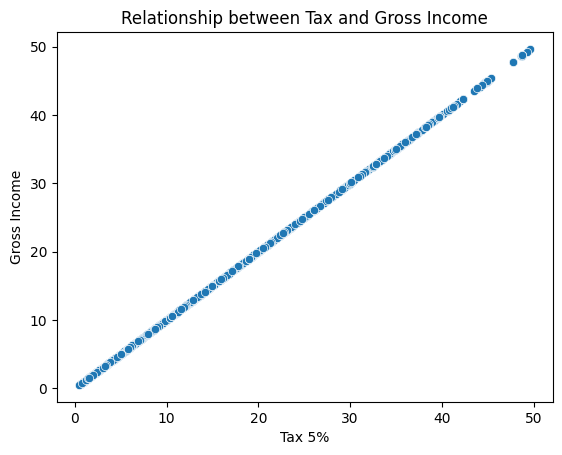

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot of tax vs. gross income
sns.scatterplot(x='Tax 5%', y='gross income', data=sales_data)
plt.title('Relationship between Tax and Gross Income')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

#Model Building and Evaluation

In [28]:
from sklearn.model_selection import train_test_split

sales_data_num = sales_data.select_dtypes(include=[np.number])

X = sales_data_num.drop('Total', axis=1)
y = sales_data_num['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Assuming sales_data is a pandas DataFrame with numerical columns only
numerical_cols = ['gross income',"Tax 5%"] # replace with actual numerical column names
X = sales_data[numerical_cols]
y = sales_data['gross income'] # replace with actual target column name

# Perform one-hot encoding on categorical columns
categorical_cols = ['City'] # replace with actual categorical column names
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(sales_data[categorical_cols]), columns=encoder.categories_[0])

# Combine numerical and encoded categorical columns
X = pd.concat([X, X_encoded], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
print("Linear Regression MSE: ", mean_squared_error(y_test, lin_reg_pred))
print("Linear Regression R^2: ", r2_score(y_test, lin_reg_pred))

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Assuming sales_data is a pandas DataFrame with numerical columns only
numerical_cols = ['gross income',"Tax 5%"] # replace with actual numerical column names
X = sales_data[numerical_cols]
y = sales_data['gross income'] # replace with actual target column name

# Perform one-hot encoding on categorical columns
categorical_cols = ['City'] # replace with actual categorical column names
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(sales_data[categorical_cols]), columns=encoder.categories_[0])

# Combine numerical and encoded categorical columns
X = pd.concat([X, X_encoded], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
print("Linear Regression MSE: ", mean_squared_error(y_test, lin_reg_pred))
print("Linear Regression R^2: ", r2_score(y_test, lin_reg_pred))


Linear Regression MSE:  1.3863059443853094e-29
Linear Regression R^2:  1.0
Linear Regression MSE:  1.3863059443853094e-29
Linear Regression R^2:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
print("Random Forest Regression MSE: ", mean_squared_error(y_test, rf_reg_pred))
print("Random Forest Regression R^2: ", r2_score(y_test, rf_reg_pred))

Random Forest Regression MSE:  0.0021044865023750682
Random Forest Regression R^2:  0.9999857348182862


In [36]:

# K-NN Regression
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
knn_reg_pred = knn_reg.predict(X_test)
print("K-NN Regression MSE: ", mean_squared_error(y_test, knn_reg_pred))
print("K-NN Regression R^2: ", r2_score(y_test, knn_reg_pred))

K-NN Regression MSE:  0.019199092499999938
K-NN Regression R^2:  0.999869859681712
